# Our purpose here is to perform some exploratory data analysis

Let's first take a look in the Santandar dataset, see how many columns it has, what are they talking about and get the basic knowledge such that we can then build a first model.

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
from sklearn.decomposition import PCA

# Dataset import, column names and basic dimensionality

In [5]:
df = pd.read_csv('../data/train.csv')

In [6]:
df.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [7]:
df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [8]:
df.isnull()

ID_code  target  var_0  var_1  var_2  var_3  var_4  var_5  var_6  \
0         False   False  False  False  False  False  False  False  False   
1         False   False  False  False  False  False  False  False  False   
2         False   False  False  False  False  False  False  False  False   
3         False   False  False  False  False  False  False  False  False   
4         False   False  False  False  False  False  False  False  False   
...         ...     ...    ...    ...    ...    ...    ...    ...    ...   
199995    False   False  False  False  False  False  False  False  False   
199996    False   False  False  False  False  False  False  False  False   
199997    False   False  False  False  False  False  False  False  False   
199998    False   False  False  False  False  False  False  False  False   
199999    False   False  False  False  False  False  False  False  False   

        var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0       False  ...    False    False    False    False    False    False   
1       False  ...    False    False    False    False    False    False   
2       False  ...    False    False    False    False    False    False   
3       False  ...    False    False    False    False    False    False   
4       False  ...    False    False    False    False    False    False   
...       ...  ...      ...      ...      ...      ...      ...      ...   
199995  False  ...    False    False    False    False    False    False   
199996  False  ...    False    False    False    False    False    False   
199997  False  ...    False    False    False    False    False    False   
199998  False  ...    False    False    False    False    False    False   
199999  False  ...    False    False    False    False    False    False   

        var_196  var_197  var_198  var_199  
0         False    False    False    False  
1         False    False    False    False  
2         False    False    False    False  
3         False    False    False    False  
4         False    False    False    False  
...         ...      ...      ...      ...  
199995    False    False    False    False  
199996    False    False    False    False  
199997    False    False    False    False  
199998    False    False    False    False  
199999    False    False    False    False  

[200000 rows x 202 columns]

In [9]:
df['target'].unique()

array([0, 1])

In [10]:
df.shape

(200000, 202)

Dataset seems to be already cleaned, no null values found and the target is indeed composed of two options

## Imbalanced dataset?

In [11]:
df[['target']].value_counts()

target
0         179902
1          20098
dtype: int64

In [12]:
180/20

9.0

Data set is not well balanced and we may need to deal with it when thinking about modelling.

## Looking for correlations among features

Text(0, 0.5, 'cumulative explained variance')

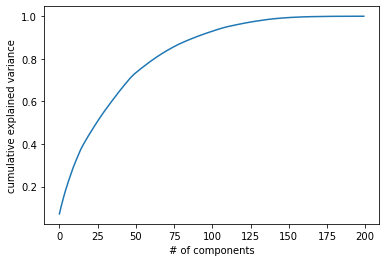

In [13]:
pca = PCA().fit(df.drop(columns=['target', 'ID_code']))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('cumulative explained variance')

In [14]:
corr = df.drop(columns=['target']).corr()

<AxesSubplot:>

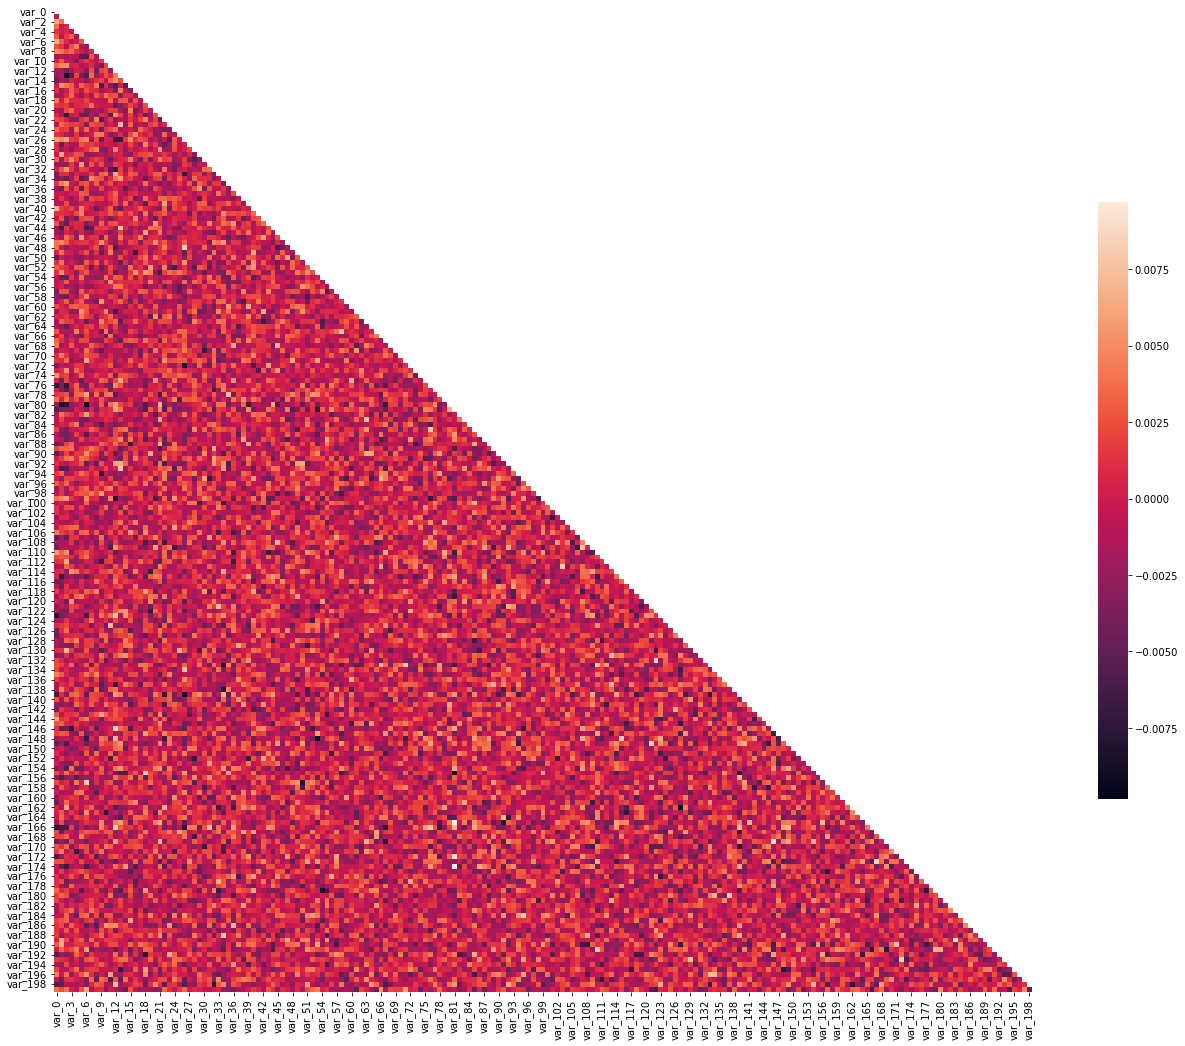

In [15]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(22,22))
sns.heatmap(corr, mask=mask, square=True, ax=ax, cbar_kws={"shrink": .5})

No correlations found among the features

## Features distribution

Let's take a look on how distributed are the features. Are they too widespread? Do they have any weird behavior?

In [16]:
std = df.drop(columns=['ID_code', 'target']).apply(lambda x: np.std(x), axis=0)

<AxesSubplot:title={'center':'Distribution of standard deviations for the features'}, xlabel='#', ylabel='std'>

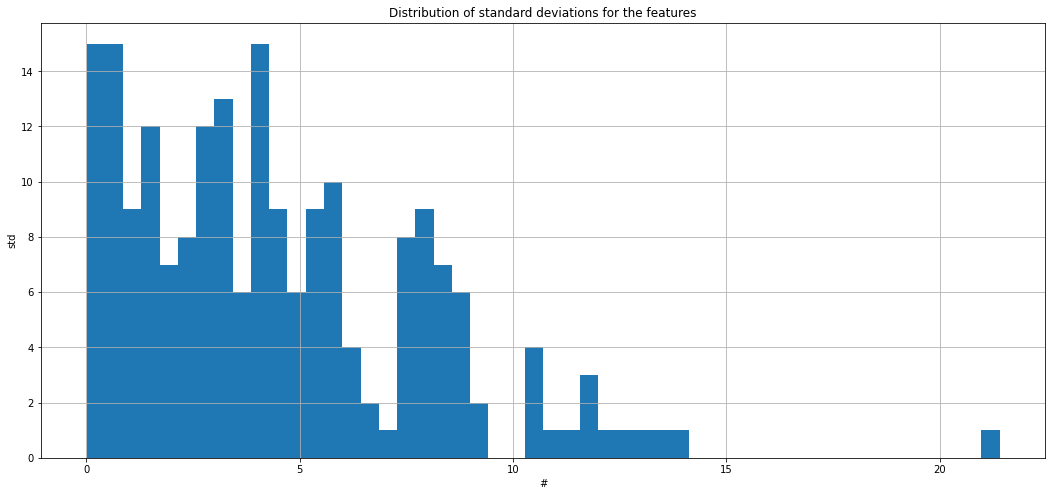

In [17]:
fig, ax = plt.subplots(figsize=(18,8))
ax.set_title('Distribution of standard deviations for the features')
ax.set_xlabel('#')
ax.set_ylabel('std')
std.hist(bins=50, ax=ax)

In [18]:
std[std > 10]

var_45     21.404858
var_47     10.579835
var_48     11.384303
var_61     11.622919
var_70     11.951712
var_74     14.112555
var_90     13.152777
var_97     12.642350
var_117    13.297629
var_120    12.120986
var_136    10.382209
var_149    10.385107
var_160    10.880235
var_187    11.574679
var_199    10.437989
dtype: float64

In [19]:
def plot_feature(var):
    fig, ax = plt.subplots(figsize=(18,8))
    ax.set_title(f'Distribution of feature {var}')
    ax.set_xlabel(var)
    df[var].hist(bins=100, ax=ax)

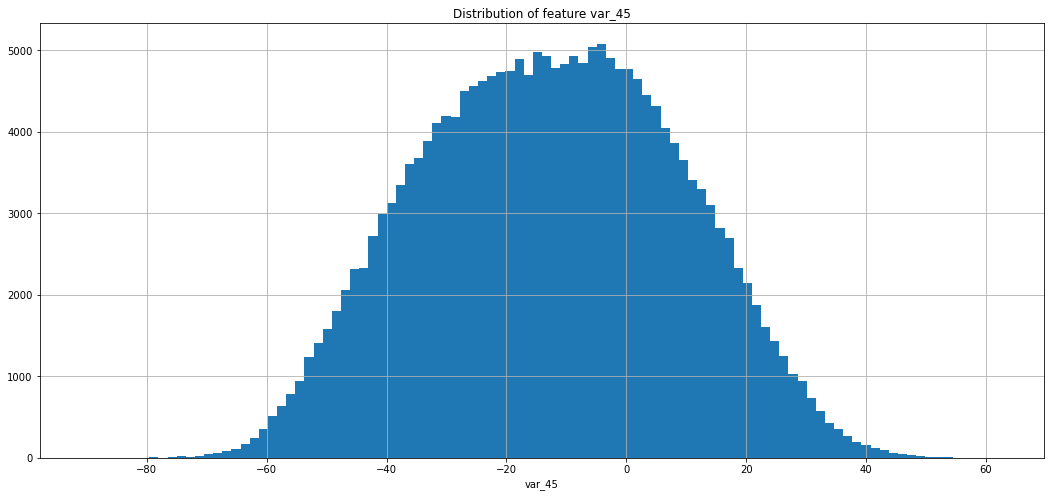

In [20]:
plot_feature('var_45')

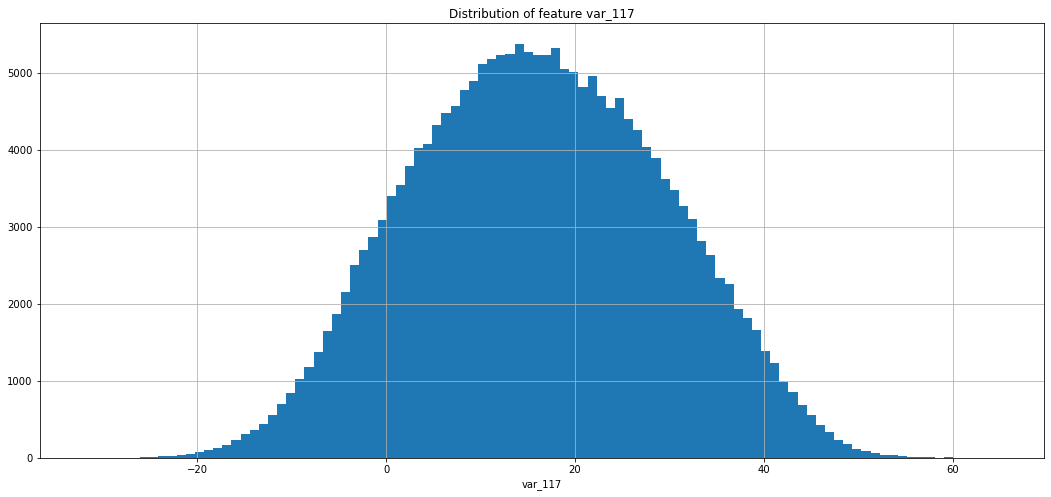

In [21]:
plot_feature('var_117')

In [22]:
min_max_ratio = df.drop(columns=['ID_code', 'target']).apply(lambda x: min(x)/max(x), axis=0)

<AxesSubplot:>

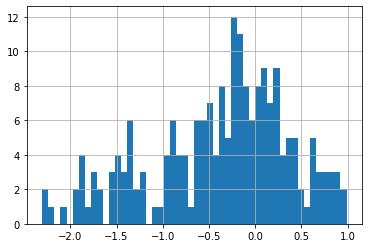

In [23]:
min_max_ratio.hist(bins=50)

In [24]:
min_max_ratio[min_max_ratio > 0.9]

var_12     0.916756
var_68     0.989479
var_108    0.931222
dtype: float64

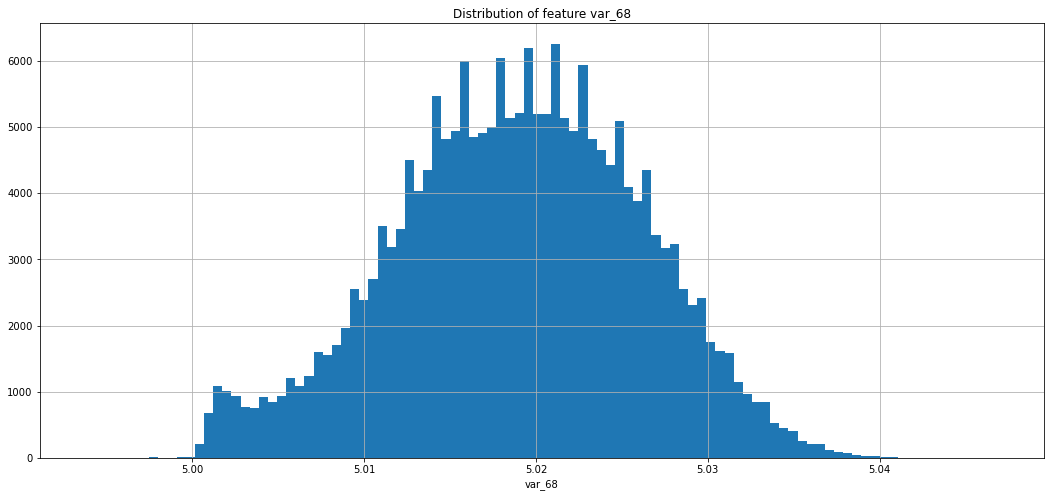

In [25]:
plot_feature('var_68')

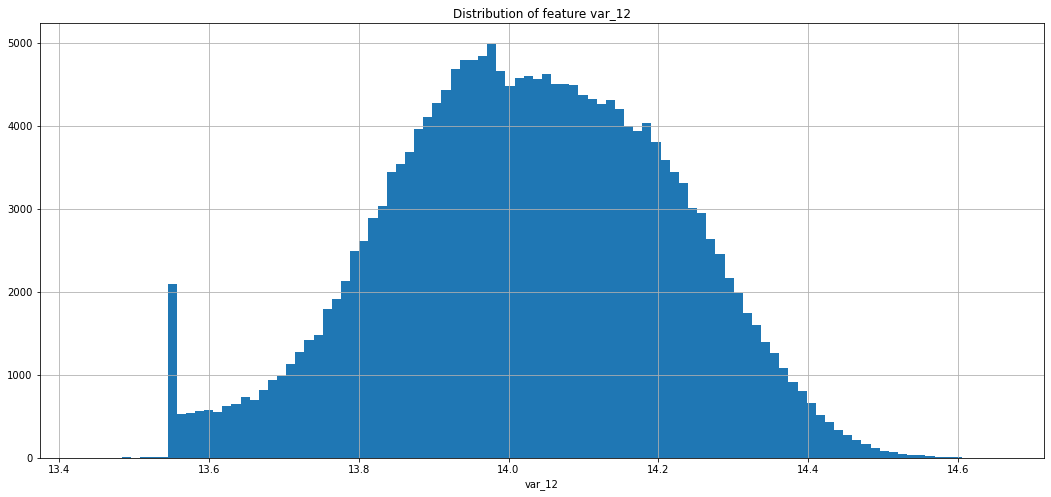

In [26]:
plot_feature('var_12')